In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_train.csv to Titanic_train (1).csv


In [3]:
df = pd.read_csv('Titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Distribution of Fare')

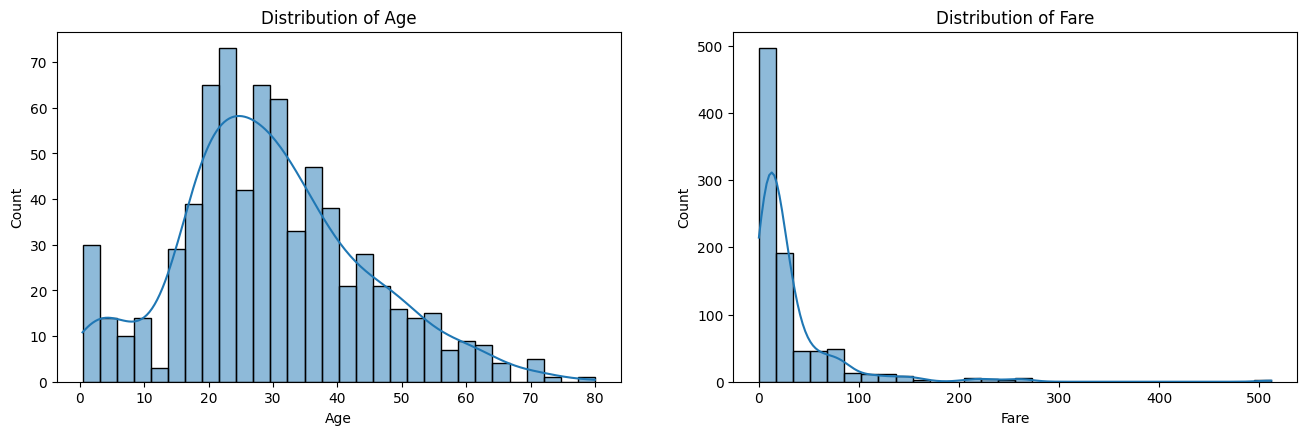

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))

# Histogram of numerical variables
plt.subplot(2, 2, 1)
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Distribution of Fare')

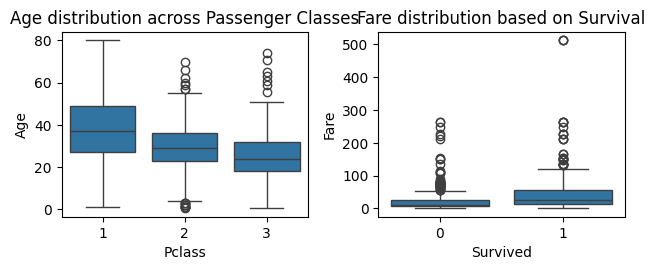

In [8]:
# Box plots for analyzing outliers
plt.subplot(2, 2, 3)
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age distribution across Passenger Classes')

plt.subplot(2, 2, 4)
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare distribution based on Survival')

plt.tight_layout()
plt.show()

**Pattern Observed in Data**


*   Age Distribution: The age distribution is right-skewed with most passengers between 20 and 40 years old. There are some outliers, particularly for passengers aged above 60.

*   Fare Distribution: The fare distribution is heavily right-skewed, with most fares clustered below 100. There are a few extreme outliers where the fare exceeds 500.

*   Age and Passenger Class: Passengers in higher classes (Pclass 1) tend to be older compared to those in lower classes (Pclass 3), where younger passengers are more common.

*   Fare and Survival: Passengers who paid higher fares were more likely to survive, indicating a possible correlation between fare and survival.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
# Handling Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

# Encoding Categorical Variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = df['Survived']
print(X)
print(y)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         3    0  22.0      1      0   7.2500       False        True
1         1    1  38.0      1      0  71.2833       False       False
2         3    1  26.0      0      0   7.9250       False        True
3         1    1  35.0      1      0  53.1000       False        True
4         3    0  35.0      0      0   8.0500       False        True
..      ...  ...   ...    ...    ...      ...         ...         ...
886       2    0  27.0      0      0  13.0000       False        True
887       1    1  19.0      0      0  30.0000       False        True
888       3    1  28.0      1      2  23.4500       False        True
889       1    0  26.0      0      0  30.0000       False       False
890       3    0  32.0      0      0   7.7500        True       False

[891 rows x 8 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: i

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8101
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [14]:
# Making predictions on the test data
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1-Score: 0.7639
ROC-AUC Score: 0.8825


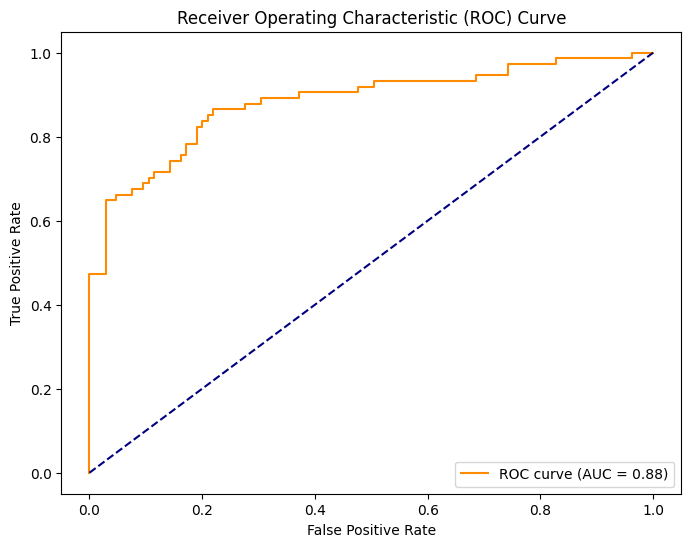

In [15]:
# Visualizing the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [16]:
import numpy as np
# Extracting the coefficients
coefficients = logreg.coef_[0]
feature_names = X_train.columns

# Creating a dataframe for easy interpretation
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Odds Ratio'] = np.exp(coef_df['Coefficient'])  # Convert to odds ratios
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)

# Displaying the coefficients
print(coef_df)

      Feature  Coefficient  Odds Ratio
1         Sex     2.590495   13.336367
5        Fare     0.002579    1.002582
2         Age    -0.030605    0.969858
4       Parch    -0.108140    0.897502
6  Embarked_Q    -0.113437    0.892760
3       SibSp    -0.295471    0.744181
7  Embarked_S    -0.399792    0.670459
0      Pclass    -0.937896    0.391451


# Discuss the Significance of Features in Predicting Survival:

1.   **Pclass (Passenger Class):**
Lower passenger classes (e.g., 3rd class) are likely to have negative coefficients, meaning passengers in lower classes had a lower probability of survival.

2.   **Sex:**
This is often a significant feature in Titanic datasets. Typically, females (Sex = 1) have a positive coefficient, indicating a higher chance of survival compared to males.

3.   **Age:**
The relationship between age and survival can be complex. Older passengers may have a lower chance of survival (negative coefficient), although this can vary.

4.   **Fare:**
Higher fares may indicate wealthier passengers, often corresponding to a positive coefficient and higher odds of survival.

5.   **SibSp (Number of Siblings/Spouses aboard):**
This could either have a positive or negative coefficient depending on whether having family increased or decreased survival chances.

6.   **Parch (Number of Parents/Children aboard):**
Similarly, having family members may increase the chances of survival, but too many dependents might have reduced survival odds.

In [17]:
pip install streamlit

In [18]:
import joblib
joblib.dump(logreg, 'titanic_logreg_model.pkl')

['titanic_logreg_model.pkl']

In [19]:
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('titanic_logreg_model.pkl')

# Title of the app
st.title("Titanic Survival Prediction App")

# Subtitle
st.write("Enter the passenger details below to predict survival:")

# User inputs
pclass = st.selectbox("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)", [1, 2, 3])
sex = st.selectbox("Sex (0 = Male, 1 = Female)", [0, 1])
age = st.slider("Age", 0, 80, 25)  # Age between 0 and 80, default 25
sibsp = st.slider("Siblings/Spouses Aboard", 0, 8, 0)  # Number of siblings/spouses aboard
parch = st.slider("Parents/Children Aboard", 0, 6, 0)  # Number of parents/children aboard
fare = st.slider("Fare", 0.0, 500.0, 50.0)  # Fare between 0 and 500, default 50
embarked = st.selectbox("Port of Embarkation (1 = C, 2 = Q, 0 = S)", [0, 1, 2])

# Organize user inputs into a DataFrame
input_data = pd.DataFrame({
    'Pclass': [pclass],
    'Sex': [sex],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Embarked_C': [1 if embarked == 1 else 0],
    'Embarked_Q': [1 if embarked == 2 else 0]
})

# Predict survival
if st.button('Predict Survival'):
    prediction = model.predict(input_data)
    survival_probability = model.predict_proba(input_data)[0][1]

    if prediction[0] == 1:
        st.success(f"The passenger is likely to survive! (Probability: {survival_probability:.2f})")
    else:
        st.error(f"The passenger is unlikely to survive. (Probability: {survival_probability:.2f})")

2024-09-24 05:26:41.619 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 05:26:42.583 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-09-24 05:26:42.593 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 05:26:42.604 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 05:26:42.610 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 05:26:42.615 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 05:26:42.617 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 05:26:42.619 Thread 'MainThread': mi